# XGBoost Methodology

### Author information
- Name: Junsuk Seo  
- email address: 21700356@handong.edu  
- GitHub: https://github.com/Junsuk-Seo

#### Part 1. Brief background of XGBoost  
##### The background of the appearance of XGBoost  
Advances in computing power led to several papers in the 1990s and early 2000s introducing new machine-learning algorithms such as random forests and AdaBoost. Among them, GBM, which uses the gradient descent technique for weight update in the boosting series, drew attention to its high prediction performance.  
However, GBM also has disadvantages, such as overfitting concerns and long time due to complicated error calculation and frequent tree updates. XGBoost appeared as an advanced version of GBM that improved the problems of this GBM.  

##### XGBoost and Higgs Boson Machine Learning Challenge  
In 2014, Kaggle and ATLAS launched the Higgs Boson Machine Learning Challenge (https://www.kaggle.com/c/higgs-boson). Countless teams took part in the $13,000 prize pool.  
Six months before the Higgs boson competition, XGBoost was released. And it got a lot of attention when it became known that those who participated in the Higgs boson competition and achieved good results saved time using XGBoost and climbed the Kaggle leaderboard.  

##### Excellence of XGBoost and where to use it
XGBoost performs very well in regression and classification problems.It is especially suitable for data with many continuous variables and is widely used for problems such as demand forecasting, price forecasting, and patient classification.



#### Part 2. Key concept of XGBoost 

##### 1. Working Principle of XGBoost

XGBoost (Extreme Gradient Boosting) is an ensemble model based on gradient boosting with decision trees. XGBoost operates based on the following steps:

##### 1-1. Objective Function of Gradient Boosting
The objective of XGBoost is to train a model that minimizes the loss function. Typically, the squared error (L2 loss) is used for regression problems, and logistic loss is used for binary classification problems. The objective function can be expressed as follows:

L(Φ) = Σ_i l(y_i, Φ(x_i)) + Σ_k Ω(f_k)

Here,
- L(Φ) represents the overall loss function.
- l(y_i, Φ(x_i)) is the loss function for individual data points (x_i, y_i).
- Φ represents the ensemble model's learned prediction function.
- f_k is the k-th decision tree model.
- Ω(f_k) is the regularization term for the complexity of the decision tree.

##### 1-2. Decision Tree Model
XGBoost uses decision trees as weak learners. A decision tree model partitions the data based on input features.

##### 1-3. Sequential Training of Gradient Boosting
XGBoost trains the decision tree models sequentially using gradient boosting. Each model is trained to compensate for the errors made by the previous model.

##### 1-4. Training of Tree Models
The decision tree models aim to find the optimal splits for the given data by using specific criteria such as information gain or Gini index.

Using this approach, XGBoost trains an ensemble model and performs predictions. Each tree model is trained to minimize the errors of the previous model, and the final predictions are made through the ensemble.  

##### 2. Main Strengths of XGBoost

XGBoost (Extreme Gradient Boosting) has several key strengths that make it a popular and powerful machine learning algorithm:

##### 2-1. High Performance:
XGBoost is known for its high performance and efficiency. It implements parallel processing and tree-based algorithms optimized for speed, making it significantly faster than traditional gradient boosting methods.

##### 2-2. Flexibility:
XGBoost is a highly flexible algorithm that can handle various types of data and solve different machine learning tasks. It supports both regression and classification problems and can be used for feature selection and ranking, missing value imputation, and handling sparse data.

##### 2-3. Regularization Techniques:
XGBoost integrates regularization techniques to prevent overfitting and improve generalization. It offers L1 and L2 regularization options, which help control the complexity of the model and enhance its predictive performance.

##### 2-4. Feature Importance Estimation:
XGBoost provides a built-in feature importance estimation mechanism. By analyzing the trained model, it can rank the importance of different features, allowing users to gain insights into the underlying data and improve feature engineering.

##### 2-5. Handling Missing Values:
XGBoost has the capability to handle missing values within the dataset. It can automatically learn how to best handle missing values during the training process, reducing the need for manual preprocessing steps.

##### 2-6. Tree Pruning:
XGBoost incorporates tree pruning techniques to prevent unnecessary splits, which helps reduce overfitting and enhances model efficiency. Pruning ensures that the tree does not grow too deep and restricts unnecessary complexity.

These strengths make XGBoost a popular choice for a wide range of machine learning problems, achieving state-of-the-art results and winning numerous Kaggle competitions.

#### Part 3. Example
The data 'co2.csv' is available for free in kaggle CO2 emissions dataset in USA https://www.kaggle.com/datasets/soheiltehranipour/co2-dataset-in-usa  
Dataset that encapsulates the carbon dioxide emissions generated from burning coal for producing electricity power in the United States of America between 1973 and 2016.

##### 1. Import required libraries and dataset
The dataset is composed of two variables: 'YYYYMM' and 'Value'  

'YYYYMM': For each month from January 1973 to July 2016  
'Value': Carbon emissions for the month

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from datetime import datetime
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler
import random

df = pd.read_csv("co2.csv")
df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y%m')
df

,YYYYMM,Value
0,1973-01-01,72.076
1,1973-02-01,64.442
2,1973-03-01,64.084
3,1973-04-01,60.842
4,1973-05-01,61.798
...,...,...
518,2016-03-01,72.840
519,2016-04-01,71.410
520,2016-05-01,82.510
521,2016-06-01,115.772


##### 2. Feature Engineering  
Create additional variables to put into xgboost to increase prediction accuracy.  

**'year'**: Year  

**'month'**: Month

**'1m_value'**: Emissions 1 month ago  

**'2m_value'**: Emissions 2 month ago  

**'3m_mean'**: Average emissions for the previous 3 months  

**'6m_mean'**: Average emissions for the previous 6 months  

**'ly_value'**: Emissions in the same period of the previous year  

**'ly_3m_value'**: 3-month emissions during the same period of the previous year  






In [4]:
# Year
df['year'] = df['YYYYMM'].apply(lambda x: x.year)

# Month
df['month'] = df['YYYYMM'].apply(lambda x: x.month)

# Emissions 1 month ago
df['1m_value'] = df['Value'].shift(1).fillna(0)

    # Emissions 2 month ago
df['2m_value'] = df['Value'].shift(2).fillna(0)

    # Average emissions for the previous 3 months
df['3m_mean'] = df['Value'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True).fillna(0)

    # Average emissions for the previous 6 months
df['6m_mean'] = df['Value'].rolling(window=6, min_periods=1).mean().reset_index(level=0, drop=True).fillna(0)

    # Emissions in the same period of the previous year
df['ly_value'] = df['Value'].shift(12).fillna(0)

    # 3-month emissions during the same period of the previous year
df['ly_3m_value'] = df['Value'].rolling(window=3, min_periods=1).sum().reset_index(level=0, drop=True).shift(12).fillna(0)

# Replace all missing values with zero
df.fillna(0, inplace=True)
df

,YYYYMM,Value,year,month,1m_value,2m_value,3m_mean,6m_mean,ly_value,ly_3m_value
0,1973-01-01,72.076,1973,1,0.000,0.000,72.076000,72.076000,0.000,0.000
1,1973-02-01,64.442,1973,2,72.076,0.000,68.259000,68.259000,0.000,0.000
2,1973-03-01,64.084,1973,3,64.442,72.076,66.867333,66.867333,0.000,0.000
3,1973-04-01,60.842,1973,4,64.084,64.442,63.122667,65.361000,0.000,0.000
4,1973-05-01,61.798,1973,5,60.842,64.084,62.241333,64.648400,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
518,2016-03-01,72.840,2016,3,92.416,113.495,92.917000,93.190167,106.412,359.061
519,2016-04-01,71.410,2016,4,72.840,92.416,78.888667,88.680333,88.646,317.475
520,2016-05-01,82.510,2016,5,71.410,72.840,75.586667,87.388167,104.498,299.556
521,2016-06-01,115.772,2016,6,82.510,71.410,89.897333,91.407167,126.280,319.424


### 3. Feature Selection and Train, Validation, Test Split
#### Train, Test Split  
Train: data before 2011  
Test: data after 2010  

#### Train, Validation Split  
Randomly split with 8:2 ratio

#### Feature selection for XGBoost
8 features: 'year' , 'month' , '1m_value' , '2m_value' , '3m_mean' , '6m_mean' , 'ly_value' , 'ly_3m_value'

In [5]:
# XGBoost Feature that we are going to use
cols = ['year','month','1m_value','2m_value','3m_mean','6m_mean','ly_value','ly_3m_value' 'Value']

end_date = datetime(2011,1,1)
df2 = df[df['YYYYMM']< end_date] #Train: ~ 2010.12
df3 = df[df['YYYYMM']>=end_date] #Test: 2011.1 ~

# 전체 데이터를 사용하여 학습
X_train = df2[cols[:-1]]  
y_train = df2['Value'] # Target Column

# Train : Validation = 8 : 2 Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Test
X_test = df3[cols[:-1]]  
y_test = df3['Value'] # Target Column

##### 4. Building a XGBoost Model and Setting Hyperparameters

**objective** = 'reg:squarederror': This specifies the objective function for regression tasks. In this case, it is set to 'reg:squarederror', which indicates that the model will optimize mean squared error (MSE) as the loss function.

**colsample_bytree** = 0.8: This parameter determines the fraction of columns (features) to be randomly sampled for each tree during training. In this case, 80% of the columns will be randomly selected for each tree.

**learning_rate** = 0.05: Also known as the "eta" parameter, it controls the learning rate or step size at each boosting iteration. A lower learning rate can help make the model more robust to overfitting but may require more iterations to converge.

**max_depth** = 7: This sets the maximum depth of each tree in the ensemble. It controls the complexity of the trees and helps prevent overfitting. Higher values allow the model to capture more complex interactions but may lead to overfitting if not carefully tuned.

**alpha** = 3: This is the L1 regularization term, also known as the "alpha" parameter. It adds a penalty term to the loss function to discourage large coefficients, promoting sparsity in the feature importance.

**n_estimators** = 1000: This determines the number of boosting rounds or trees to be built. It specifies the maximum number of iterations that the boosting algorithm will go through.

In [8]:
# Initialize XGBoost Model
random.seed(123456)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                              colsample_bytree=0.8, 
                              learning_rate=0.05,
                              max_depth=7, 
                              alpha=3, 
                              n_estimators=1000)

# Model Train
xg_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)],early_stopping_rounds=10, verbose=False)

# Model Test
y_pred = xg_reg.predict(X_test)

c:\Users\user\anaconda3\envs\gpuenv\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


### 5. Visualize the Result and Calculate the Error Metrics

#### Error Metrics:
**RMSE**: RMSE measures the average deviation between predicted and actual values, providing an indication of the typical prediction error.

**NRMSE**: NRMSE is a normalized version of RMSE that scales the error relative to the range of the target variable, enabling comparison across different datasets or variable scales.

C:\Users\user\AppData\Local\Temp\ipykernel_33948\1423303383.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Pred'] = y_pred


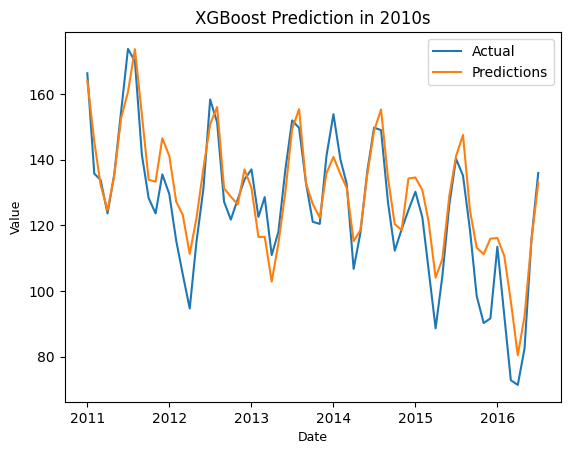

RMSE: 	 9.37411965960397
NRMSE: 	 0.09161750287929757


In [9]:
# RMSE 
rmse = np.sqrt(np.mean((np.array(y_pred) - np.array(y_test.values))**2))
y_max = max(y_test.values)
y_min = min(y_test.values)
# NRMSE 
nrmse = rmse / (y_max - y_min)

# Prediction Result Visualization
df3['Pred'] = y_pred
plt.xlabel("Date", fontsize=9)
plt.ylabel("Value", fontsize=9)
plt.plot(df3['YYYYMM'], df3[["Value", "Pred"]])#varies
plt.legend([ "Actual", "Predictions"], loc="upper right")
plt.title("XGBoost Prediction in 2010s")
plt.show()

#Error Metric Result
print('RMSE: \t', rmse)
print('NRMSE: \t', nrmse)